In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("input/billionaire.csv")
data.head()

,Name,NetWorth,Country,Source,Rank,Age,Industry
0,Jeff Bezos,$177 B,United States,Amazon,1,57.0,Technology
1,Elon Musk,$151 B,United States,"Tesla, SpaceX",2,49.0,Automotive
2,Bernard Arnault & family,$150 B,France,LVMH,3,72.0,Fashion & Retail
3,Bill Gates,$124 B,United States,Microsoft,4,65.0,Technology
4,Mark Zuckerberg,$97 B,United States,Facebook,5,36.0,Technology


In [3]:
data.isnull().sum()
data = data.dropna()
data.isnull().sum()
data["NetWorth"] = data["NetWorth"].str.strip("$")
data["NetWorth"] = data["NetWorth"].str.strip("B")
data["NetWorth"] = data["NetWorth"].astype(float)
data.head()

,Name,NetWorth,Country,Source,Rank,Age,Industry
0,Jeff Bezos,177.0,United States,Amazon,1,57.0,Technology
1,Elon Musk,151.0,United States,"Tesla, SpaceX",2,49.0,Automotive
2,Bernard Arnault & family,150.0,France,LVMH,3,72.0,Fashion & Retail
3,Bill Gates,124.0,United States,Microsoft,4,65.0,Technology
4,Mark Zuckerberg,97.0,United States,Facebook,5,36.0,Technology


In [4]:
df = data.sort_values(by=["NetWorth"], ascending=False).head(10).reset_index()
df

,index,Name,NetWorth,Country,Source,Rank,Age,Industry
0,0,Jeff Bezos,177.0,United States,Amazon,1,57.0,Technology
1,1,Elon Musk,151.0,United States,"Tesla, SpaceX",2,49.0,Automotive
2,2,Bernard Arnault & family,150.0,France,LVMH,3,72.0,Fashion & Retail
3,3,Bill Gates,124.0,United States,Microsoft,4,65.0,Technology
4,4,Mark Zuckerberg,97.0,United States,Facebook,5,36.0,Technology
5,5,Warren Buffett,96.0,United States,Berkshire Hathaway,6,90.0,Finance & Investments
6,6,Larry Ellison,93.0,United States,software,7,76.0,Technology
7,7,Larry Page,91.5,United States,Google,8,48.0,Technology
8,8,Sergey Brin,89.0,United States,Google,9,47.0,Technology
9,9,Mukesh Ambani,84.5,India,diversified,10,63.0,Diversified


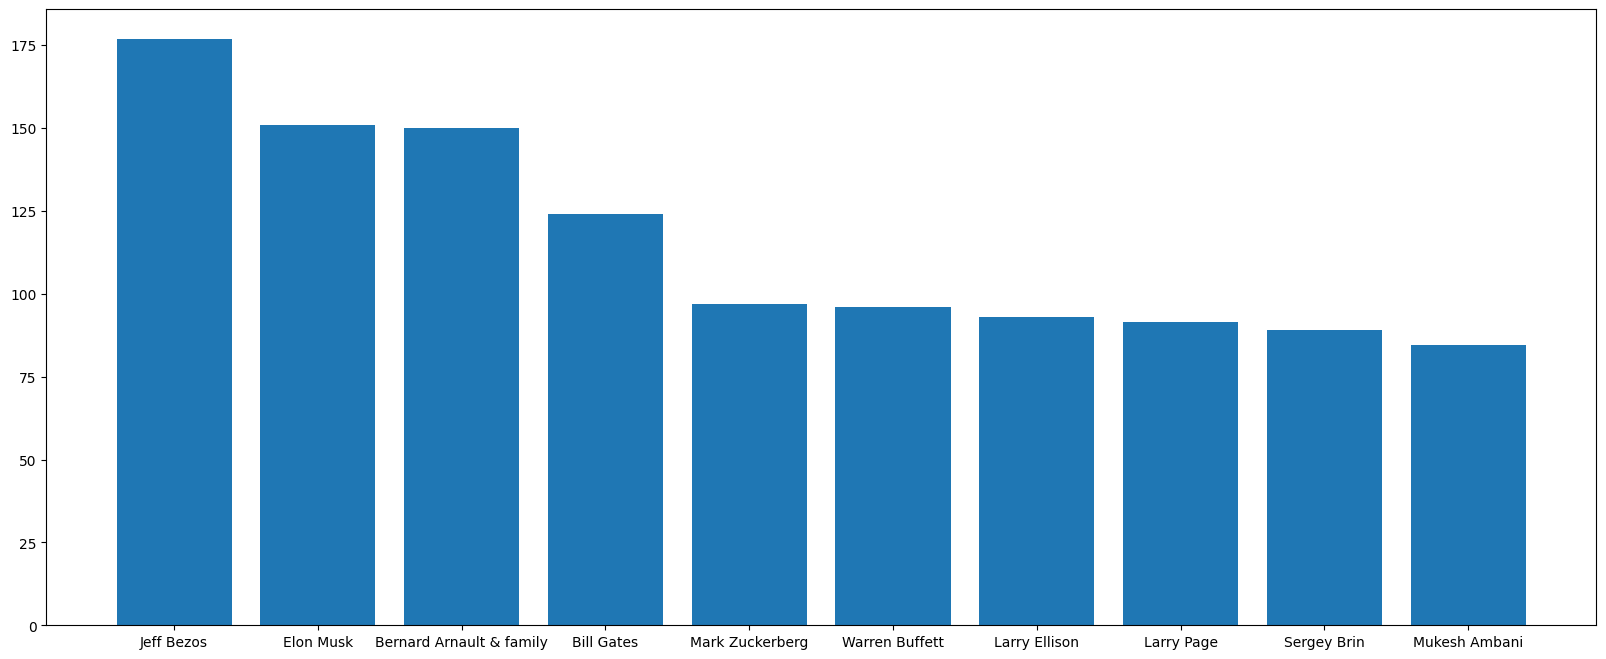

In [5]:
plt.figure(figsize=(20, 8))
plt.bar(df["Name"], df["NetWorth"])
plt.show()

In [6]:
df = data["Source"].value_counts().head(10).reset_index()
df

,Source,count
0,real estate,169
1,pharmaceuticals,96
2,investments,89
3,diversified,78
4,software,61
5,retail,44
6,hedge funds,42
7,private equity,35
8,consumer goods,32
9,chemicals,32


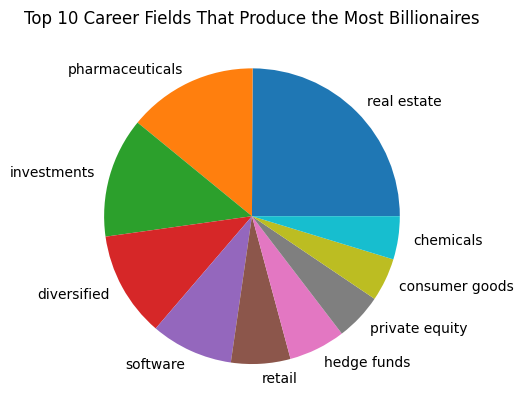

In [7]:
plt.pie(df["count"], labels=df["Source"])
plt.title("Top 10 Career Fields That Produce the Most Billionaires")
plt.show()

In [8]:
df = data["Industry"].value_counts().reset_index()
df

,Industry,count
0,Finance & Investments,365
1,Technology,355
2,Manufacturing,317
3,Fashion & Retail,268
4,Healthcare,213
5,Real Estate,211
6,Food & Beverage,204
7,Diversified,180
8,Energy,99
9,Media & Entertainment,92


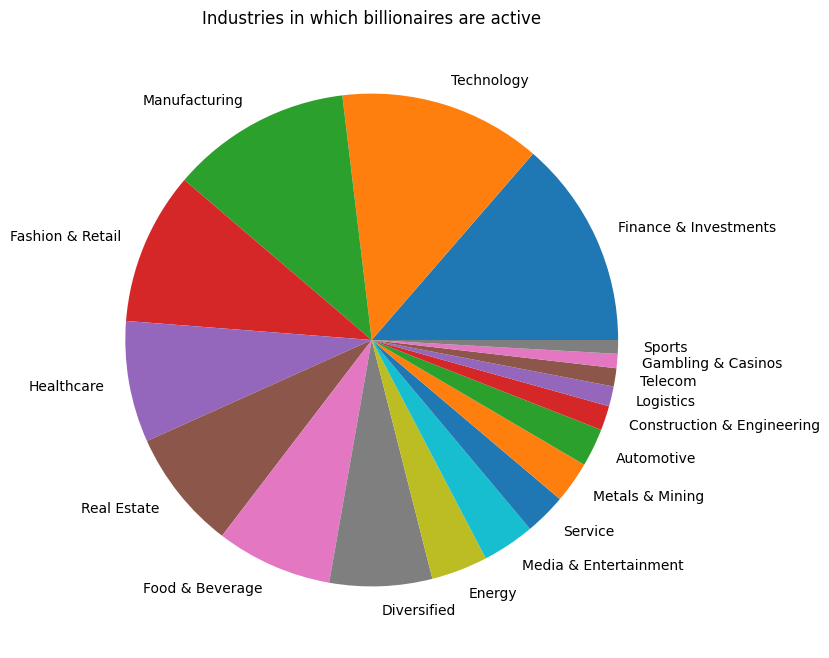

In [9]:
plt.figure(figsize=(8, 8))
plt.pie(df["count"], labels=df["Industry"])
plt.title("Industries in which billionaires are active")
plt.show()

In [10]:
df = data["Country"].value_counts().head().reset_index()
df

,Country,count
0,United States,720
1,China,610
2,India,134
3,Russia,118
4,Germany,115


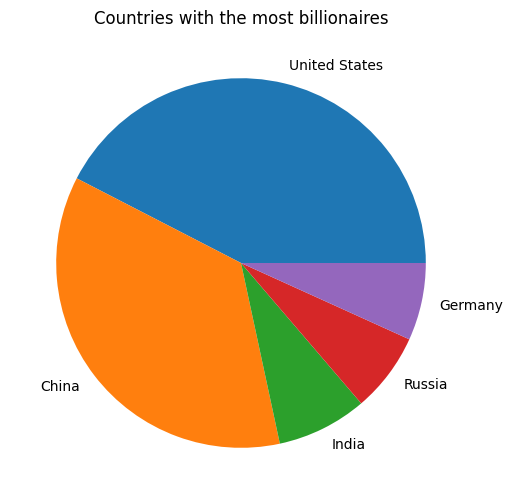

In [11]:
plt.figure(figsize=(6, 6))
plt.pie(df["count"], labels=df["Country"])
plt.title("Countries with the most billionaires")
plt.show()

In [12]:
df = data[["Name", "Age"]] # or df = data.filter(["Name", "Age"])
df.head()

,Name,Age
0,Jeff Bezos,57.0
1,Elon Musk,49.0
2,Bernard Arnault & family,72.0
3,Bill Gates,65.0
4,Mark Zuckerberg,36.0


In [13]:
df = data["Age"].mean()
df

63.1136023916293

In [14]:
df = data["Age"].var()
df

180.7721364011008

In [15]:
df = data.groupby("Country")["NetWorth"].sum().reset_index()
df = df.sort_values(by=['NetWorth'], ascending=False)
df.head()

,Country,NetWorth
66,United States,4384.7
8,China,2496.1
50,Russia,586.0
18,Germany,576.6
24,India,567.3


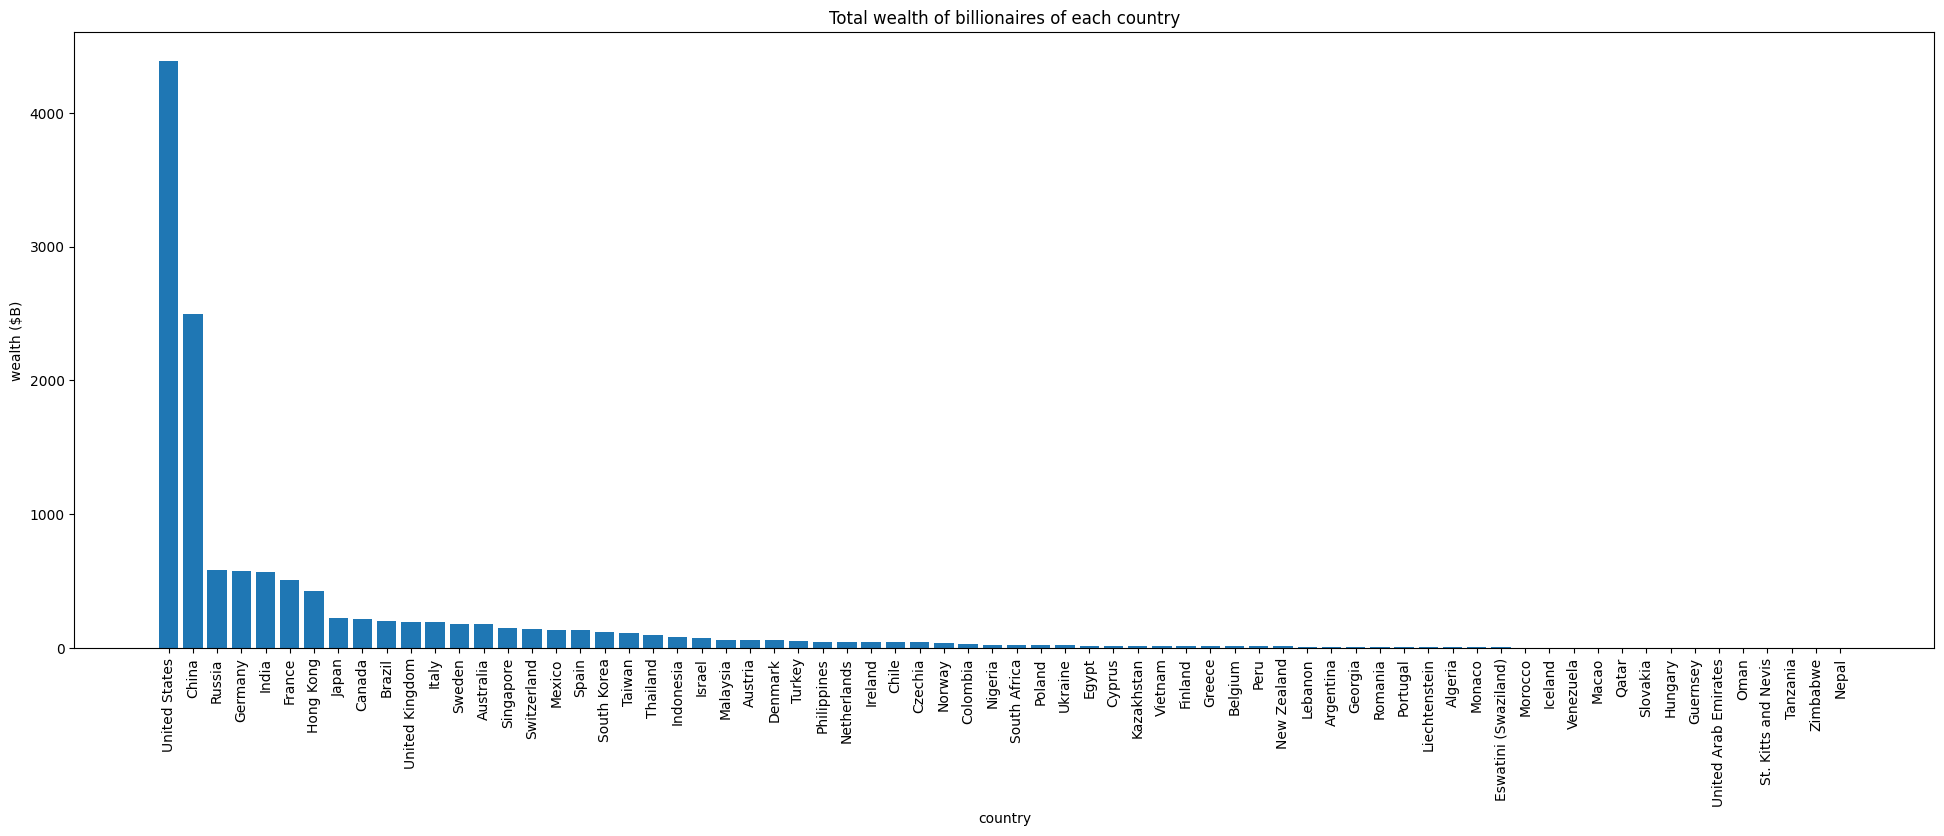

In [16]:
plt.figure(figsize=(24, 8))
plt.bar(df["Country"], df["NetWorth"])
plt.xticks(rotation=90)
plt.xlabel("country")
plt.ylabel("wealth ($B)")
plt.title("Total wealth of billionaires of each country")
plt.show()

In [17]:
df=data.query("Country=='United States'").reset_index()
df.head()

,index,Name,NetWorth,Country,Source,Rank,Age,Industry
0,0,Jeff Bezos,177.0,United States,Amazon,1,57.0,Technology
1,1,Elon Musk,151.0,United States,"Tesla, SpaceX",2,49.0,Automotive
2,3,Bill Gates,124.0,United States,Microsoft,4,65.0,Technology
3,4,Mark Zuckerberg,97.0,United States,Facebook,5,36.0,Technology
4,5,Warren Buffett,96.0,United States,Berkshire Hathaway,6,90.0,Finance & Investments


In [18]:
df=df.sort_values(by=["NetWorth"],ascending=False).head(10).reset_index()
df

,level_0,index,Name,NetWorth,Country,Source,Rank,Age,Industry
0,0,0,Jeff Bezos,177.0,United States,Amazon,1,57.0,Technology
1,1,1,Elon Musk,151.0,United States,"Tesla, SpaceX",2,49.0,Automotive
2,2,3,Bill Gates,124.0,United States,Microsoft,4,65.0,Technology
3,3,4,Mark Zuckerberg,97.0,United States,Facebook,5,36.0,Technology
4,4,5,Warren Buffett,96.0,United States,Berkshire Hathaway,6,90.0,Finance & Investments
5,5,6,Larry Ellison,93.0,United States,software,7,76.0,Technology
6,6,7,Larry Page,91.5,United States,Google,8,48.0,Technology
7,7,8,Sergey Brin,89.0,United States,Google,9,47.0,Technology
8,8,13,Steve Ballmer,68.7,United States,Microsoft,14,65.0,Technology
9,9,16,Alice Walton,61.8,United States,Walmart,17,71.0,Fashion & Retail


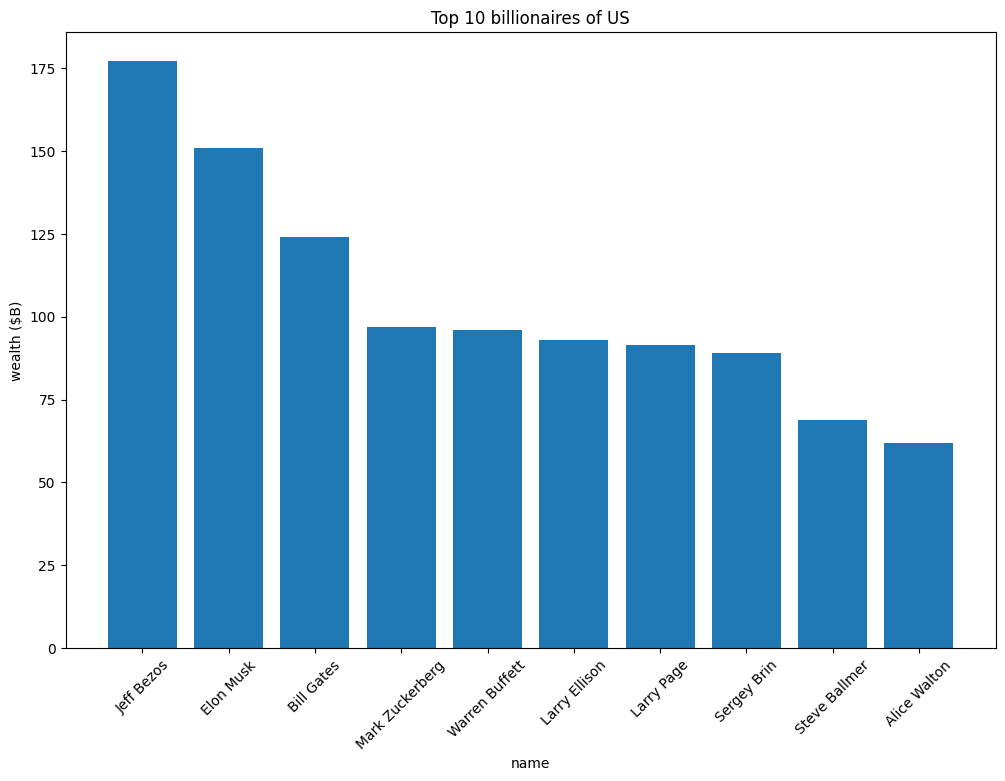

In [19]:
plt.figure(figsize=(12, 8))
plt.bar(df["Name"], df["NetWorth"])
plt.xticks(rotation=45)
plt.xlabel("name")
plt.ylabel("wealth ($B)")
plt.title("Top 10 billionaires of US")
plt.show()

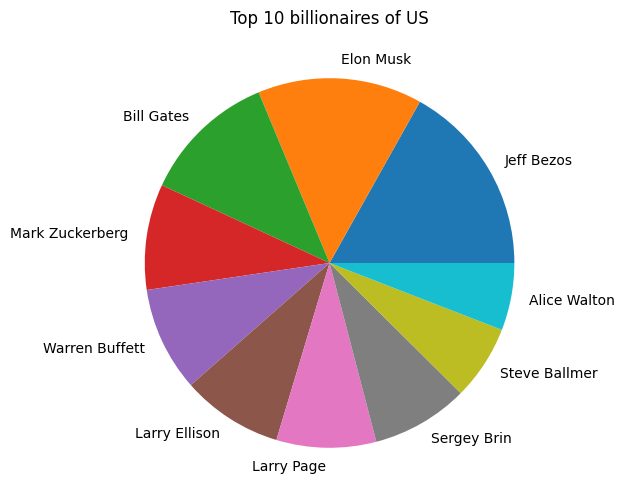

In [20]:
plt.figure(figsize=(6, 6))
plt.pie(df["NetWorth"], labels=df["Name"])
plt.title("Top 10 billionaires of US")
plt.show()

In [21]:
df = data["Country"].value_counts().tail(10).reset_index()
df

,Country,count
0,Tanzania,1
1,Guernsey,1
2,Oman,1
3,United Arab Emirates,1
4,Macao,1
5,Venezuela,1
6,Eswatini (Swaziland),1
7,Algeria,1
8,Liechtenstein,1
9,Nepal,1


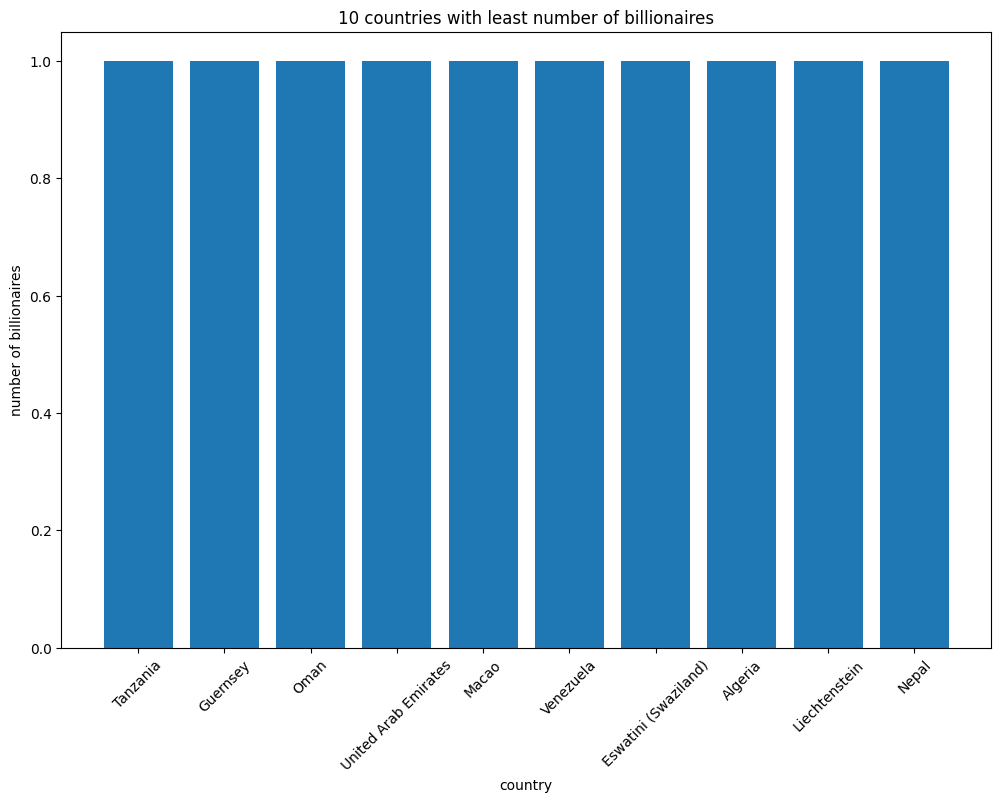

In [22]:
plt.figure(figsize=(12, 8))
plt.bar(df["Country"], df["count"])
plt.xticks(rotation=45)
plt.xlabel("country")
plt.ylabel("number of billionaires")
plt.title("10 countries with least number of billionaires")
plt.show()